# Hola Francisco!

Mi nombre es David Bautista, soy code reviewer de Practicum y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres.**

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

# Contenido

* [Introducción](#intro)
    * [Objetivo](#obj)
* [Descripción de datos](#desc)
* [Caracteristicas y objetivo](#co)
* [Modelo de regresión lineal](#mr)
    * [Mejorando calidad modelo](#mcrse)
* [Modelo de Árbol de decisión](#mad)
    * [Mejorando calidad modelo](#mcrad)
* [Modelo de Bosque aleatorio](#mbd)
    * [Mejorando calidad modelo](#mcrbd)
* [Conclusión final](#final_conclution)

# Introducción <a id = 'intro'></a>

Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros
descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.
Necesitamos predecir si un cliente dejará el banco pronto. 


## Objetivo<a id = 'obj'></a>

Crea un modelo con el máximo valor F1 posible de al menos 0.59 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien hecho, buena forma de dar inicio al proyecto.
</div>


# Descripción de datos<a id = 'desc'></a>

In [97]:
#Librerias necesarias

import pandas as pd
import matplotlib as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score

In [98]:
#cargar nuestro data sets
data = pd.read_csv('/datasets/Churn.csv')

In [99]:
#Información de data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [100]:
#Visualización de una muestra de 10 datos
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Nuestro dataset esta conformado por un total de 10,000 filas y 14 columnas cuya descripción es la siguiente:
 
* `RowNumber`: índice de cadena de datos
*`CustomerId`: identificador de cliente único
* `Surname`: apellido
* `CreditScore`: valor de crédito
* `Geography`: país de residencia
* `Gender:` sexo
* `Age` edad
* `Tenure`: período de maduración para el depósito fijo de un cliente (años)
* `Balance`: saldo de la cuenta
* `NumOfProducts`: número de productos bancarios utilizados por el cliente
* `HasCrCard`: el cliente tiene una tarjeta de crédito
* `IsActiveMember`: actividad del cliente
* `EstimatedSalary`: salario estimado
* `Exited`: El cliente se ha ido

Observamos que nuestra columna de `Tenure` tiene valores nulos la cual trataremos, se convertiran los nombres de las columnas a minusculas para mayor facilidad de manejo, en cuanto a los tipos usados todos están correctos

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien hecho!
</div>

In [101]:
data[data.Tenure.isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [102]:
#Cambio a minusculas de los titulos de las columnas
data.columns = data.columns.str.lower()

#Visualización de cambios
data.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [103]:
#Observamos descripción de Tenure
data.tenure.describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

Observamos que tiene una media alta, tambien no se puede encontrar alguna relación entre nuestras demás características por lo que optaremos a realizar nuestra imputación con la mediana de nuestra columna `tenure`

In [104]:
#Rellenar nuestros valores nulos con la mediana
data.tenure = data.tenure.fillna(data.tenure.median())

#Verificamos si tenemos valores nulos
print('Valores nulos en la columna tenure:', data.tenure.isna().sum())

Valores nulos en la columna tenure: 0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien hecho!
</div>

# Caracteristicas y objetivo <a id = 'co'></a>

Antes de comenzar vamos a definir nuestras características y nuestro objetivo, tenemos algunas caracteristicas que no nos serán de mucha utilidad por las cuales las descartaremos, haremos una copia de nuestro dataset para hacer todo esto.

Columnas a eliminar:
* `rownumber`
* `custumerid`
* `surname`

características a utilizar para el modelo:

* `creditscore`
* `geography`
* `gender` 
* `age`
* `tenure`
* `balance`
* `numOfproducts`
* `hasCrcard`
* `isactiveMember`
* `estimatedSalary`


Objetivo
* `exited`

In [105]:
#Copia de nuestro dataset
data_copy = data.copy()


#Eliminamos nuestra columna de rownumber, customerid,surname
data_copy.drop(columns = ['rownumber', 'customerid','surname'], inplace = True)

#Se usará para los modelados con arboles
df_copy = data_copy

#Visualizamos la información
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  float64
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien hecho, interesante que describes lo que va a suceder con cada columna de los datos.
</div>

Observaremos la proporcion de los clientes que se van del banco

<AxesSubplot:title={'center':'Frequency client leaving'}, xlabel='Class', ylabel='Number of observations'>

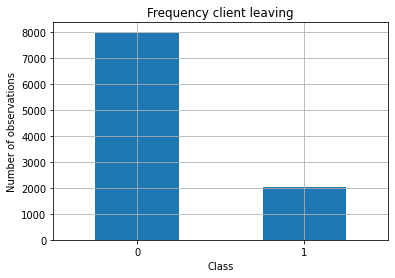

In [106]:
#Visualización de distribución de clientes que permanecen y de los que se van
(
    data_copy['exited']
    .value_counts(sort= True)
    .plot(kind = 'bar', rot = 1, title = 'Frequency client leaving',
          xlabel = 'Class', ylabel = 'Number of observations', grid = True)
)




Podemos observar que es casi el 20% de personas son las que han abandonado al banco. Haremos un modelado con tres métodos: regresión lineal, árbol de decisión y bosque aleatorio

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien hecho, con esta exploración es evidente el desbalance de las clases a predecir, a partir de esto podrás desarrollar con más calidad el resto del proyecto. ¡Genial!
</div>

# Modelado de regresión lineal <a  id = 'mr'></a>

En nuestros datos de caracteristicas observamos que tenemos dos columnas que son de tipo object haremos uso del OHE para evitar errores

In [107]:
#Aplicamos OHE para transformación de caracteristicas categóricas a numéricas
data_copy = pd.get_dummies(data_copy, drop_first=True)

#Visualización de nuestro data
data_copy.head(10)

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8.0,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7.0,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4.0,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4.0,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2.0,134603.88,1,1,1,71725.73,0,0,0,1


Dividiremos nuestra tabla en caracteristicas y objetivos y la dividiremos en 25% para validación y el resto para entrenamiento

In [108]:
#Dividimos nuestas características y nuestro objetivo
target = data_copy['exited']
features = data_copy.drop('exited', axis = 1)

#Dividimos nuestros datos en entrenamiento y de pruebas
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, random_state = 12345, test_size = 0.25
) 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien hecho, muy buen trabajo.
</div>

In [109]:
#Función para entrenamiento de modelo de regresión y calculos de precisión, recall, f1 y visualización de matriz de confusión
def logistic_regression(f_train,f_valid, t_train, t_valid, classweight = None):

    #Realizamos nuestro modelo y lo entrenamos
    model = LogisticRegression(solver = 'liblinear',random_state = 12345, class_weight = classweight)
    model.fit(f_train,t_train)
    predicted_valid = model.predict(f_valid)

    #Matriz de confusión
    conf_matrix= confusion_matrix(t_valid, predicted_valid)
    sns.heatmap(conf_matrix, annot=True, fmt="d")

    #Valor de F1
    print('F1 value:',f1_score(t_valid,predicted_valid))
    
    probabilities_valid = model.predict_proba(f_valid)
    probabilities_one_valid = probabilities_valid[:, 1]

    # valor auc-roc
    auc_roc = roc_auc_score(t_valid, probabilities_one_valid)
    print('auc-roc value:', auc_roc)

F1 value: 0.11707317073170732
auc-roc value: 0.6760847542270101


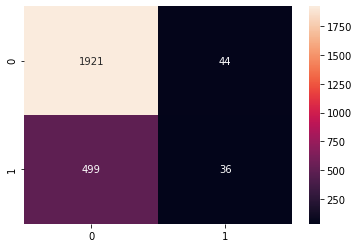

In [110]:
#Aplicación de función para modelo desbalanceado
logistic_regression(features_train,features_valid, target_train, target_valid)

Para nuestro caso del modelo entrenado sin equilibrio tenemos un valor F1 muy bajo mientras nuestro valor de AUC no está tan mal

## Mejorando calidad del modelo <a id = 'mcrse'></a>

**Balanceo de modelo**

F1 value: 0.491250810110175
auc-roc value: 0.7563691707688284


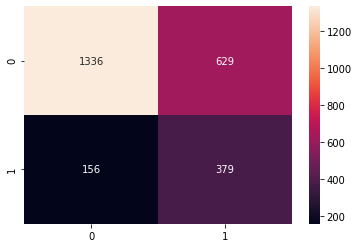

In [111]:
#Aplicación de función para modelo desbalanceado
logistic_regression(features_train,features_valid, target_train, target_valid, classweight = 'balanced')

Al aplicar el argumento class_weigth = balanced mejoramos nuestro recall, nuestra precisión ha disminuido un .09% pero nuestro valor F1 ha mejorado considerablemente, aunque aun no se aproxima al valor que esperamos.

**Subajuste**

In [112]:
#Función para realizar el sobre ajuste
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

F1 value: 0.3531353135313531
auc-roc value: 0.7377070699864451


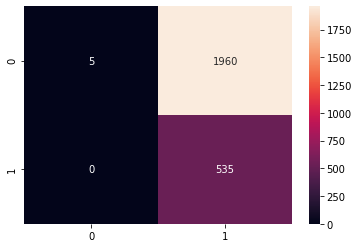

In [113]:
#Aplicación de sobreajuste
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 30
)


logistic_regression(features_upsampled,features_valid,target_upsampled, target_valid)

**Submuestreo**

In [114]:
#Función para realizar el submuestreo
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


F1 value: 0.2846153846153846
auc-roc value: 0.6893714774916173


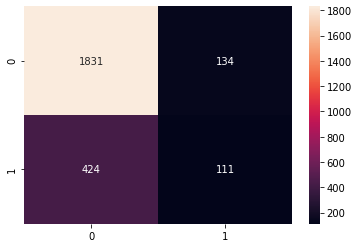

In [115]:
features_downsampled, target_downsampled = downsample(
    features_train, target_train, .6
)

logistic_regression(features_downsampled,features_valid,target_downsampled, target_valid)



**Conclusión**

Podemos observar que nuestro mejor modelo fue haciendo uso del balanceo con un valor de F1 de .49 y un auc_roc de .75 sin embargo aun no llegamos a nuestro valor de F1 esperado a continuació se  tratará el problema haciendo uso de arboles de decisión

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien hecho,  resalto el hecho de que creas funciones para después ejecutar los modelos y las técnicas de balanceo, esto permite que no repitas código y que tu proyecto tenga muy buen orden, felicitaciones. Por otro lado, es interesante los resultados que obtienes con cada uno de los métodos de balance que aplicaste para este modelo 
</div>

# Modelo de árbol de decisión<a id = 'mad'></a>

Para trabajar con nuestro árbolde decisión tenemos que hacer uso de encoder para pasar nuestras variables categóricas a númericas, este nuevo data lo guardaremos en nuestra dataset data_ordinal y dividiremos esa data en caracteristicas y objetivo e igualmente como lo realizado en el modelo anterior haremos una función para el entrenamiento del modelo y haremos nuestra primera prueba sin equilibrar nuestro modelo

In [116]:
#Codificación de etiquetas

encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(df_copy), columns=df_copy.columns)


#visualización de dataset
data_ordinal.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,228.0,0.0,0.0,24.0,2.0,0.0,0.0,1.0,1.0,5068.0,1.0
1,217.0,2.0,0.0,23.0,1.0,743.0,0.0,0.0,1.0,5639.0,0.0
2,111.0,0.0,0.0,24.0,8.0,5793.0,2.0,1.0,0.0,5707.0,1.0
3,308.0,0.0,0.0,21.0,1.0,0.0,1.0,0.0,0.0,4704.0,0.0
4,459.0,2.0,0.0,25.0,2.0,3696.0,0.0,1.0,1.0,3925.0,0.0


In [117]:
#Dividimos nuestas características y nuestro objetivo
target = data_ordinal['exited']
features = data_ordinal.drop('exited', axis = 1)

#Dividimos nuestros datos en entrenamiento y de pruebas
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, random_state = 12345, test_size = 0.25
) 

In [118]:
#Función para realizar el modelo
def tree_classifier(f_train,f_valid, t_train, t_valid, classweight = None):

    #Realizamos nuestro modelo y lo entrenamos
    model = DecisionTreeClassifier(random_state = 12345, class_weight = classweight)
    model.fit(f_train,t_train)
    predicted_valid = model.predict(f_valid)

    #Matriz de confusión
    conf_matrix= confusion_matrix(t_valid, predicted_valid)
    sns.heatmap(conf_matrix, annot=True, fmt="d")


    #Valor de F1
    print('F1 value:',f1_score(t_valid,predicted_valid))
    
    probabilities_valid = model.predict_proba(f_valid)
    probabilities_one_valid = probabilities_valid[:, 1]

    # valor auc-roc
    auc_roc = roc_auc_score(t_valid, probabilities_one_valid)
    print('auc-roc value:', auc_roc)

F1 value: 0.46225535880708296
auc-roc value: 0.6579843523340706


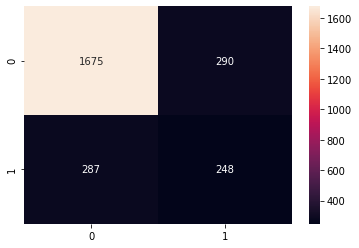

In [119]:
 tree_classifier(features_train,features_valid, target_train, target_valid)

A diferencia de nuestro modelado con regresión lineal, este tiene un mucho mejor de F1 pero ha disminuido nuestro valor AUC-ROC, trabajaremos en el equilibrio de este modelo para ver si podemos mejorar nuestras metricas

## Mejorando calidad del modelo <a id = 'mcrad'></a>

**Balanceo de modelo**

F1 value: 0.47428571428571425
auc-roc value: 0.6650258020023305


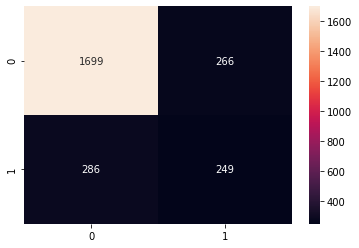

In [120]:
tree_classifier(features_train,features_valid, target_train, target_valid, classweight = 'balanced')

**Sobreajuste**

F1 value: 0.453416149068323
auc-roc value: 0.6507288768400276


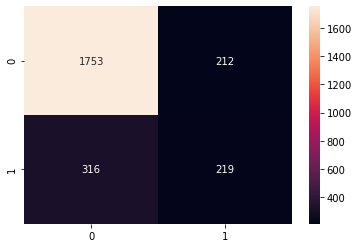

In [121]:
#Aplicación de sobreajuste

features_upsampled, target_upsampled = upsample(
    features_train, target_train, 100
)

tree_classifier(features_upsampled,features_valid, target_upsampled, target_valid)


**Submuestreo**

F1 value: 0.47762803234501355
auc-roc value: 0.6908634753037979


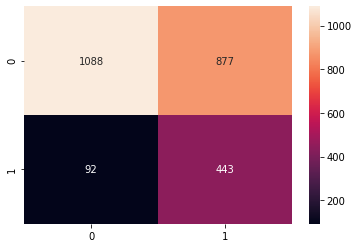

In [122]:
features_downsampled, target_downsampled = downsample(
    features_train, target_train, .1
)

tree_classifier(features_downsampled,features_valid, target_downsampled, target_valid)

**Conclusión**

Este modelo nos dió mejores resultado que el de regresión lineal, nuestro mejor modelo equilibrado fuen con el submuestreo, aunque no mejoró drasticamente conforme a los resultados del modelo sin equilibrio, a continuación se probará el modelo de random Forest

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien hecho, buen trabajo con el árbol de decisión y la experimentación de las diferentes técnicas para balancear los targets. Por otro lado, destaco las conclusiones que generas, estas permiten construir un hilo conductor del proyecto, muy bien.
</div>

# Modelo de bosque de decisión <a id= 'mbd'></a>

Para nuestro modelo utilizaremos los datos de features y target obtenidos en en modelo de árbol de decisión, de igual forma realizaremos una función para el entrenamiento del modelo

In [123]:
def tree_random(f_train,f_valid, t_train, t_valid,n_estimators=10, classweight = None):

    #Realizamos nuestro modelo y lo entrenamos =n_estimators,
    model = RandomForestClassifier(random_state = 12345,n_estimators =n_estimators, class_weight = classweight)
    model.fit(f_train,t_train)
    predicted_valid = model.predict(f_valid)

    #Matriz de confusión
    conf_matrix= confusion_matrix(t_valid, predicted_valid)
    sns.heatmap(conf_matrix, annot=True, fmt="d")


    #Valor de F1
    print('F1 value:',f1_score(t_valid,predicted_valid))
    
    probabilities_valid = model.predict_proba(f_valid)
    probabilities_one_valid = probabilities_valid[:, 1]

    # valor auc-roc
    auc_roc = roc_auc_score(t_valid, probabilities_one_valid)
    print('auc-roc value:', auc_roc)


F1 value: 0.5320435308343411
auc-roc value: 0.8376799600485125


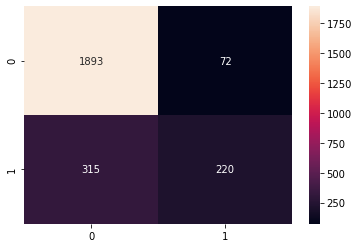

In [124]:
tree_random(features_train,features_valid, target_train, target_valid, n_estimators=20)

Este modelo nos ha dado mejores valores que nuestros modelos anteriores e inclusive sin estar equilibrado los modelos anteriores no se acercaban a los valores dados por este a continuación aplicaremos métodos de equilibrio

## Mejorando calidad del modelo <a id = mcrbd></a>

**Balanceo de modelo**

F1 value: 0.5514705882352942
auc-roc value: 0.8513524054124753


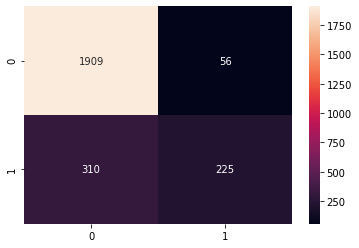

In [125]:
tree_random(features_train,features_valid, target_train, target_valid, n_estimators=50, classweight = 'balanced')

**Sobreajuste**

F1 value: 0.591983556012333
auc-roc value: 0.8296506622910276


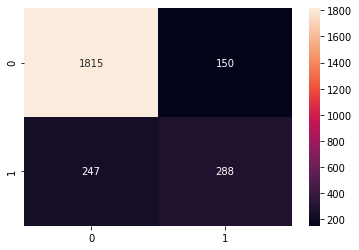

In [126]:
#Aplicación de sobreajuste

features_upsampled, target_upsampled = upsample(
    features_train, target_train, 100
)

tree_random(features_upsampled,features_valid, target_upsampled, target_valid, n_estimators=35)


**Submuestro**

F1 value: 0.5032751091703057
auc-roc value: 0.810268007895175


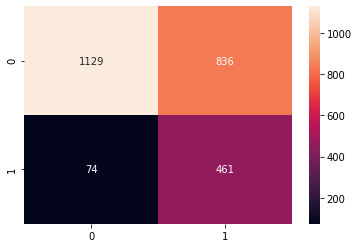

In [127]:
features_downsampled, target_downsampled = downsample(
    features_train, target_train, .1
)

tree_random(features_downsampled,features_valid,target_downsampled, target_valid, n_estimators=10)


**Conclusión**

como se pudo observar en el principio con este modelo tuvo unas métricas superiores a los demas, haciendo uso de sobreajuste pudimos tener nuestro valor esperado con una estimación de 35, nuestro valor de auc roc bajo un poco considerando el modelo desequilibrado.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, también quiero recalcar el uso de heatmaps y matrices de confusión para el análisis de los resultados de cada modelo.
</div>

# Conclusión Final <a id = 'final_conclution'></a>

Contamos con un dataset inicial de 10,000 datos y 14 columnas con tipos de datos correctos y con una sola columna con valores nulos que se imputaron mediante el uso de la mediana

Se realizó el modelado del dataset mediante el uso de:
* Regresión lineal
* Árbol de decisión
* Random Forest

Evaluamos los modelos en su estado desequilibrado y aplicamos los métods de balanceo, sobreajuste y submuestro para el mejoramiento de estas. Nuestro modelo con mejor metrica fue el de `random forest` aplicando  sobreajuste pudimos obtener un F1 score de .59 nuestro valor Auc-Roc disminuyó un poco respecto a el valor que nos dío en su estado de desequilibrio, pero aun así era un valor de casi .83

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentarios Generales

Felicitaciones, el proyecto respondía a todo lo esperado y se desarrollo contenido de buena calidad. Buen trabajo Francisco.
</div>